In [ ]:
#load the model MLP Final Model
import pickle
model_name = "/content/drive/MyDrive/1:1_Hanish_Acharla/Models/mlp_final_model"
file_name = open(model_name, 'rb')
final_model = pickle.load(file_name)
print("Model is loaded")

Model is loaded


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
#read the data file
test_data = pd.read_csv("/content/drive/MyDrive/1:1_Hanish_Acharla/Dataset/Final_Dataset/Featurization/test_augment.csv")
test_data.shape

(1746, 2049)

In [ ]:
labels = test_data["label"].unique()
labels.sort()
print(labels)
#then encode the labels
test_data['label'] = pd.factorize(test_data['label'], sort = True)[0]

['complex' 'frog_eye_leaf_spot' 'healthy' 'powdery_mildew' 'rust' 'scab']


In [ ]:
import numpy as np
#separating the true labels for the evaluations
y_true = np.array(test_data['label'].to_list())

In [ ]:
#getting predictions data
test_data_list = test_data.iloc[:,:-1].values
y_pred = []
for row_data in test_data_list:
  predictions = final_model.predict(np.array([row_data]))
  y_pred.append(predictions[0])
print("Predictions: {}".format(y_pred))

Predictions: [2, 0, 2, 5, 1, 2, 2, 4, 2, 5, 2, 1, 4, 4, 5, 3, 3, 5, 1, 4, 2, 2, 5, 0, 2, 2, 0, 2, 0, 5, 2, 5, 1, 1, 2, 1, 2, 2, 0, 4, 0, 1, 1, 3, 3, 2, 2, 1, 2, 2, 1, 4, 5, 3, 2, 5, 1, 2, 5, 2, 4, 5, 5, 5, 5, 2, 5, 5, 2, 1, 5, 4, 5, 4, 2, 1, 5, 3, 5, 1, 5, 5, 2, 1, 5, 3, 1, 1, 5, 4, 2, 3, 2, 1, 2, 2, 5, 3, 1, 5, 5, 2, 0, 5, 2, 1, 4, 2, 5, 2, 2, 0, 3, 1, 4, 2, 0, 5, 5, 5, 2, 1, 1, 1, 5, 1, 1, 5, 4, 2, 0, 2, 2, 5, 5, 2, 5, 2, 5, 1, 5, 1, 1, 0, 2, 4, 0, 2, 5, 1, 4, 1, 1, 0, 2, 5, 0, 5, 1, 5, 4, 1, 5, 2, 5, 5, 4, 2, 2, 5, 1, 2, 0, 1, 5, 2, 4, 0, 3, 4, 2, 4, 1, 1, 5, 2, 5, 0, 2, 1, 5, 5, 0, 2, 1, 3, 5, 2, 1, 2, 1, 1, 4, 1, 2, 1, 2, 1, 1, 5, 5, 5, 5, 2, 2, 0, 2, 4, 2, 0, 0, 1, 0, 0, 2, 2, 0, 5, 2, 4, 5, 5, 2, 2, 5, 5, 5, 1, 2, 2, 4, 0, 5, 0, 4, 5, 1, 1, 0, 2, 4, 4, 0, 5, 5, 3, 2, 2, 2, 4, 5, 5, 5, 5, 1, 0, 1, 0, 2, 2, 5, 1, 2, 3, 5, 2, 2, 5, 2, 4, 5, 5, 3, 1, 2, 5, 5, 4, 4, 2, 5, 2, 0, 5, 5, 0, 1, 2, 5, 4, 5, 5, 1, 4, 1, 4, 2, 0, 2, 0, 4, 4, 4, 1, 0, 0, 1, 0, 5, 4, 3, 3, 0, 2, 1, 5, 5, 4, 4,

In [ ]:
def model_evaluations(y_true, y_pred, labels):
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
  acc_score = accuracy_score(y_true, y_pred)
  print("Accuracy score: {}\n".format(acc_score))
  print("Classification Report: {}".format(classification_report(y_true, y_pred)))
  plt.figure(figsize = (10,10))
  sns.heatmap(confusion_matrix(y_true, y_pred),  annot = True, fmt="g", cmap = "Blues", xticklabels = labels, yticklabels = labels)
  plt.title("Consfuion Matrix")
  plt.show()
  return classification_report(y_true, y_pred, output_dict = True)

Accuracy score: 0.9032073310423826

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.78      0.80       203
           1       0.92      0.86      0.89       316
           2       0.94      0.94      0.94       459
           3       0.91      0.99      0.95        90
           4       0.89      0.92      0.90       196
           5       0.90      0.92      0.91       482

    accuracy                           0.90      1746
   macro avg       0.89      0.90      0.90      1746
weighted avg       0.90      0.90      0.90      1746



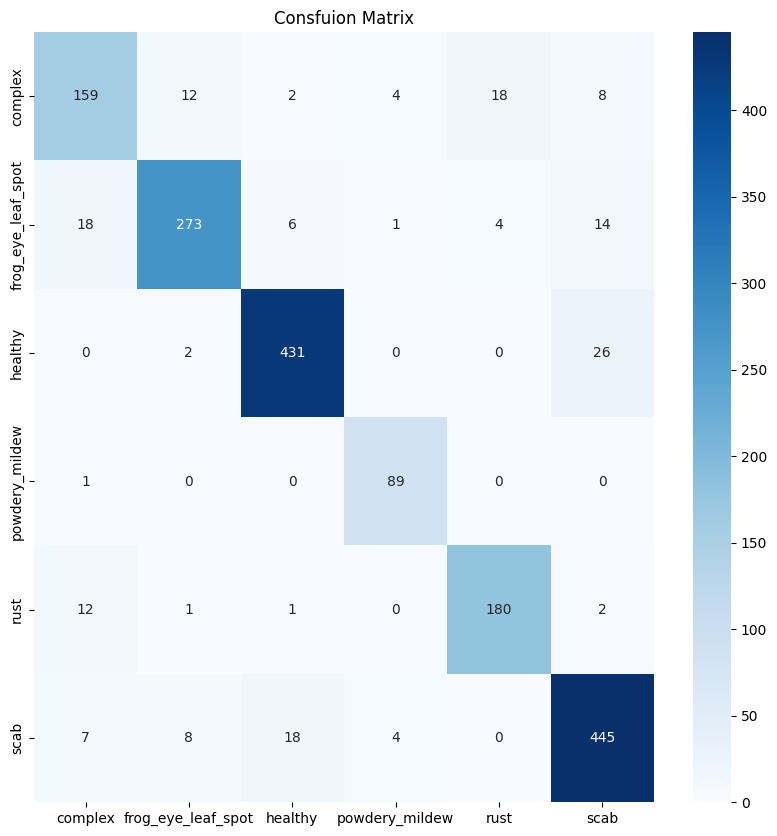

{'0': {'precision': 0.8071065989847716, 'recall': 0.7832512315270936, 'f1-score': 0.795, 'support': 203.0}, '1': {'precision': 0.9222972972972973, 'recall': 0.8639240506329114, 'f1-score': 0.8921568627450981, 'support': 316.0}, '2': {'precision': 0.9410480349344978, 'recall': 0.9389978213507625, 'f1-score': 0.9400218102508179, 'support': 459.0}, '3': {'precision': 0.9081632653061225, 'recall': 0.9888888888888889, 'f1-score': 0.9468085106382979, 'support': 90.0}, '4': {'precision': 0.8910891089108911, 'recall': 0.9183673469387755, 'f1-score': 0.9045226130653267, 'support': 196.0}, '5': {'precision': 0.898989898989899, 'recall': 0.9232365145228216, 'f1-score': 0.9109518935516888, 'support': 482.0}, 'accuracy': 0.9032073310423826, 'macro avg': {'precision': 0.8947823674039133, 'recall': 0.902777642310209, 'f1-score': 0.8982436150418716, 'support': 1746.0}, 'weighted avg': {'precision': 0.9031677686781248, 'recall': 0.9032073310423826, 'f1-score': 0.9028376806086721, 'support': 1746.0}}


In [ ]:
#getting evaulations
report = model_evaluations(y_true, y_pred, labels)
print(report)